In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
import glob
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

from tqdm.notebook import tqdm
from pycaret.regression import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [5]:
from haversine import haversine
 
# 위경도 입력
smart_farm = (35.21, 128.12)  #Latitude, Longitude
대기관측소 = (35.180609, 128.121781)

# 거리 계산
haversine(smart_farm, 대기관측소, unit = 'km')

3.272139131667774

In [9]:
# 위경도 입력
from haversine import haversine
 
smart_farm = (35.21, 128.12)  #Latitude, Longitude
기상관측소 = (35.16378, 128.04004)

# 거리 계산
haversine(smart_farm, 기상관측소, unit = 'km')

8.900357556587554

In [10]:
#data = pd.read_csv("smart_farm_final.csv")
org_data = pd.read_csv("smart_farm_final.csv")
org_data.shape

(148168, 57)

In [11]:
org_data

,시간,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),내부 온도,내부 습도,차광스크린(수평),차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),누적강수량,현지기압,해면기압,일조,년월일,PM10_1시간,PM25_1시간,오존_1시간,이산화질소_1시간,일산화탄소_1시간,아황산가스_1시간,차광스크린_개방,차광스크린_광도조절,차광스크린_개방조절,차열스크린_온도조절,차열스크린_광도조절,차열스크린_개방조절,일출시간,일몰시간,일출3시간후,일출1시간후,일몰3시간후,일몰1시간반전,하루길이,시간범주,일몰전후,일출일몰,지면온도,오존등급,아황산가스등급,이산화질소등급,PM10등급,PM25등급
0,2021-11-26 00:00:00,2021,11,26,0,0,0.0,5.8,67,0.0,325,18.30,62.000,0,0,0,0,0,0,1,0.0,28,18.0,0.9,0.0,1018.2,1021.9,29180.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
1,2021-11-26 00:01:00,2021,11,26,0,1,0.0,5.8,67,0.4,344,18.10,63.400,0,0,0,0,0,0,1,0.0,28,18.0,0.9,0.0,1018.2,1021.9,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
2,2021-11-26 00:02:00,2021,11,26,0,2,0.0,5.7,67,0.9,105,17.70,65.200,0,0,0,0,0,0,1,1.0,28,18.0,0.9,0.0,1018.1,1021.8,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
3,2021-11-26 00:03:00,2021,11,26,0,3,0.0,5.7,67,1.3,123,17.70,63.900,0,0,0,0,0,0,1,1.0,28,18.0,0.8,0.0,1018.1,1021.8,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
4,2021-11-26 00:04:00,2021,11,26,0,4,0.0,5.7,67,0.9,123,17.60,64.700,0,0,0,0,0,0,1,1.0,28,18.0,1.0,0.0,1018.1,1021.8,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148163,2022-03-20 23:55:00,2022,3,20,23,55,0.0,6.2,61,0.4,344,18.55,73.650,0,0,0,0,0,0,1,0.0,28,18.0,NaN,0.0,1017.8,1021.5,31738.0,2022-03-20,15.0,13.0,0.040,0.009,0.3,0.004,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,632,1839,932,732,2139,1709,1207,야간,일몰1시간반_후,일몰,4.6,보통,좋음,좋음,좋음,좋음
148164,2022-03-20 23:56:00,2022,3,20,23,56,0.0,6.2,61,0.0,344,18.55,72.860,0,0,0,0,0,0,1,0.0,28,18.0,NaN,0.0,1017.8,1021.5,31738.0,2022-03-20,15.0,13.0,0.040,0.009,0.3,0.004,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,632,1839,932,732,2139,1709,1207,야간,일몰1시간반_후,일몰,4.6,보통,좋음,좋음,좋음,좋음
148165,2022-03-20 23:57:00,2022,3,20,23,57,0.0,6.1,61,0.4,344,18.45,74.090,0,0,0,0,0,0,1,0.0,28,18.0,NaN,0.0,1017.8,1021.5,31738.0,2022-03-20,15.0,13.0,0.040,0.009,0.3,0.004,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,632,1839,932,732,2139,1709,1207,야간,일몰1시간반_후,일몰,4.6,보통,좋음,좋음,좋음,좋음
148166,2022-03-20 23:58:00,2022,3,20,23,58,0.0,6.1,61,0.4,346,18.50,73.660,0,0,0,0,0,0,1,0.0,28,18.0,NaN,0.0,1017.9,1021.6,31738.0,2022-03-20,15.0,13.0,0.040,0.009,0.3,0.004,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,632,1839,932,732,2139,1709,1207,야간,일몰1시간반_후,일몰,4.6,보통,좋음,좋음,좋음,좋음


In [12]:
org_data.head(3)

,시간,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),내부 온도,내부 습도,차광스크린(수평),차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),누적강수량,현지기압,해면기압,일조,년월일,PM10_1시간,PM25_1시간,오존_1시간,이산화질소_1시간,일산화탄소_1시간,아황산가스_1시간,차광스크린_개방,차광스크린_광도조절,차광스크린_개방조절,차열스크린_온도조절,차열스크린_광도조절,차열스크린_개방조절,일출시간,일몰시간,일출3시간후,일출1시간후,일몰3시간후,일몰1시간반전,하루길이,시간범주,일몰전후,일출일몰,지면온도,오존등급,아황산가스등급,이산화질소등급,PM10등급,PM25등급
0,2021-11-26 00:00:00,2021,11,26,0,0,0.0,5.8,67,0.0,325,18.3,62.0,0,0,0,0,0,0,1,0.0,28,18.0,0.9,0.0,1018.2,1021.9,29180.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
1,2021-11-26 00:01:00,2021,11,26,0,1,0.0,5.8,67,0.4,344,18.1,63.4,0,0,0,0,0,0,1,0.0,28,18.0,0.9,0.0,1018.2,1021.9,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통
2,2021-11-26 00:02:00,2021,11,26,0,2,0.0,5.7,67,0.9,105,17.7,65.2,0,0,0,0,0,0,1,1.0,28,18.0,0.9,0.0,1018.1,1021.8,0.0,2021-11-26,33.0,22.0,0.003,0.028,0.4,0.003,0,1000미만,0%~30%개방,23도미만,800미만,0%~30%개방,713,1717,1013,813,2017,1547,1004,야간,일몰1시간반_후,일몰,2.7,좋음,좋음,좋음,보통,보통


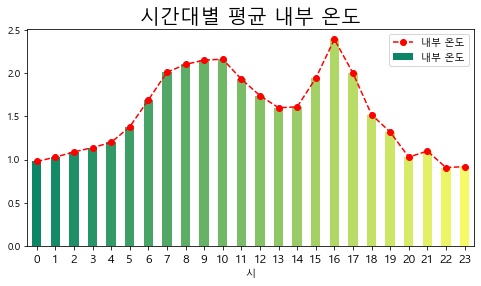

In [13]:
sun = org_data.groupby(["시"]).std().reset_index()
sun["내부 온도"] = sun["내부 온도"].apply(lambda x : round(x,2))

fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', 24) ## 바 차트 색상
sun.plot.bar(x="시",y="내부 온도", color=colors,ax=ax)
sun.plot(x="시",y="내부 온도",color="red",
                 linestyle="--",marker="o",ax=ax)
plt.xticks(rotation=360,fontsize=12)
plt.title("시간대별 평균 내부 온도",fontsize=20)
plt.show()

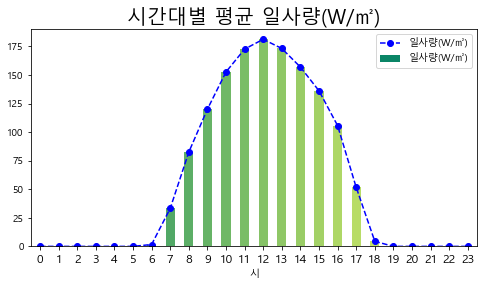

In [14]:
sun = org_data.groupby(["시"]).std().reset_index()
sun["일사량(W/㎡)"] = sun["일사량(W/㎡)"].apply(lambda x : round(x,2))

fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', 24) ## 바 차트 색상
sun.plot.bar(x="시",y="일사량(W/㎡)", color=colors,ax=ax)
sun.plot(x="시",y="일사량(W/㎡)",color="b",
                 linestyle="--",marker="o",ax=ax)
plt.xticks(rotation=360,fontsize=12)
plt.title("시간대별 평균 일사량(W/㎡)",fontsize=20)
plt.show()

In [15]:
smart_farm = pd.read_csv("smart_farm.csv")
columns = pd.read_csv("(스마트팜)테이블 정의서.csv")

smart_farm.columns = list(columns["정의"])
smart_farm.head()

time_lst = []
ymd_lst = []

for idx, row in smart_farm.iterrows():
    date = datetime(int(row["년도"]), int(row["월"]), int(row["일"]), int(row["시"]), int(row["분"]))
    time_lst.append(date)
    
    ymd = datetime(int(row["년도"]), int(row["월"]), int(row["일"]))
    ymd_lst.append(ymd)
    
smart_farm["시간"] = time_lst
smart_farm["년월일"] = ymd_lst

smart_farm = smart_farm[["시간","년월일","년도",'월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)',
       '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)',
       '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)',
       '난방온도(설정온도)', '열공급량(kWh)']]

일사량 데이터 이상치

Text(0.5, 1.0, '일사량(W/㎡)의 밀도추정함수')

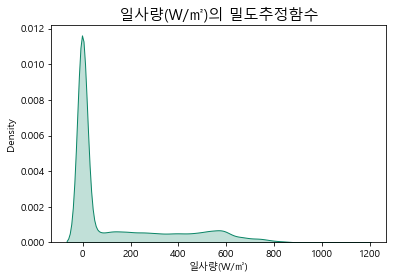

In [16]:
sns.kdeplot(smart_farm["일사량(W/㎡)"], shade=True,color=colors[0])
plt.title("일사량(W/㎡)의 밀도추정함수",fontsize=15)

<AxesSubplot:xlabel='환기온도(천창 제어온도)', ylabel='Density'>

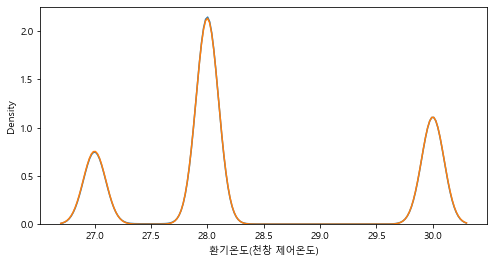

In [17]:
fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

sns.kdeplot(smart_farm["환기온도(천창 제어온도)"],ax=ax)
sns.kdeplot(org_data["환기온도(천창 제어온도)"],ax=ax)

Text(0.5, 1.0, '환기온도(천창 제어온도) 데이터 분포')

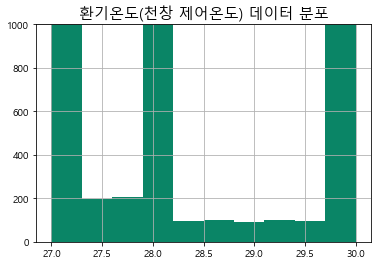

In [18]:
fig,ax = plt.subplots(1,1,figsize=(6,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

smart_farm["환기온도(천창 제어온도)"].hist(ax=ax,color=colors[0])
plt.ylim([0, 1000])
plt.title("환기온도(천창 제어온도) 데이터 분포",fontsize=15)

Text(0.5, 1.0, '환기온도(천창 제어온도) 변환 후, 데이터 분포')

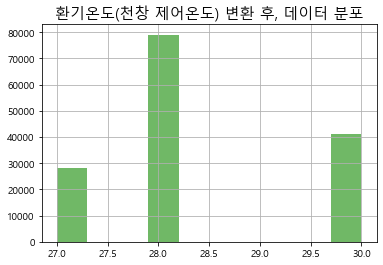

In [19]:
fig,ax = plt.subplots(1,1,figsize=(6,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

org_data["환기온도(천창 제어온도)"].hist(ax=ax,color=colors[10])
plt.title("환기온도(천창 제어온도) 변환 후, 데이터 분포",fontsize=15)

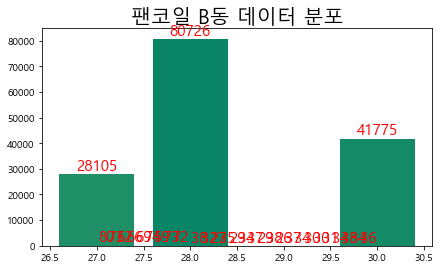

In [20]:
fig = plt.figure(figsize=(7,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

x = smart_farm["환기온도(천창 제어온도)"].value_counts().index
y = smart_farm["환기온도(천창 제어온도)"].value_counts().values
plt.bar(x,y,color=colors)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.title("팬코일 B동 데이터 분포",fontsize=20)
plt.show()

In [21]:
org_data["시간"] = org_data["시간"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [22]:
weekday = ["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]
org_data["요일"] = org_data["시간"].apply(lambda x : weekday[x.weekday()])

In [23]:
data_weekday = org_data.groupby(["시"]).mean().reset_index()
data_weekday["열공급량(kWh)"] = data_weekday["열공급량(kWh)"].apply(lambda x : round(x,2))

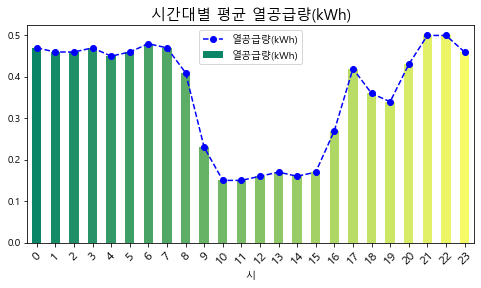

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', 24) ## 바 차트 색상
data_weekday.plot.bar(x="시",y="열공급량(kWh)", color=colors,ax=ax)
data_weekday.plot(x="시",y="열공급량(kWh)",color="b",
                 linestyle="--",marker="o",ax=ax)
plt.xticks(rotation=45,fontsize=12)
plt.title("시간대별 평균 열공급량(kWh)",fontsize=15)
plt.show()

In [25]:
data_weekday = org_data.groupby(["시"]).std().reset_index()
data_weekday["열공급량(kWh)"] = data_weekday["열공급량(kWh)"].apply(lambda x : round(x,2))

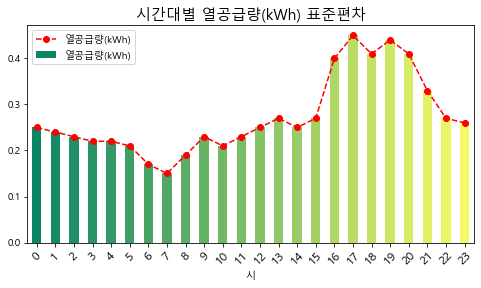

In [26]:
fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', 24) ## 바 차트 색상
data_weekday.plot.bar(x="시",y="열공급량(kWh)", color=colors,ax=ax)
data_weekday.plot(x="시",y="열공급량(kWh)",color="r",
                 linestyle="--",marker="o",ax=ax)
plt.xticks(rotation=45,fontsize=12)
plt.title("시간대별 열공급량(kWh) 표준편차",fontsize=15)
plt.show()

In [27]:
colors = sns.color_palette('summer', 3) ## 바 차트 색상

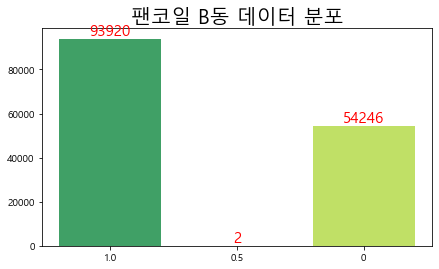

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(7,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정

x = np.arange(3)
x= ['1.0', '0.5', '0']
y = [93920, 2, 54246]
plt.bar(x,y,color=colors)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.title("팬코일 B동 데이터 분포",fontsize=20)
plt.show()

,요일,열공급량(kWh)
3,월요일,0.32
6,화요일,0.36
2,수요일,0.40
1,목요일,0.38
0,금요일,0.35
5,토요일,0.35
4,일요일,0.35


In [31]:
data_weekday = org_data.groupby(["요일"]).mean().reset_index()
data_weekday["열공급량(kWh)"] = data_weekday["열공급량(kWh)"].apply(lambda x : round(x,2))

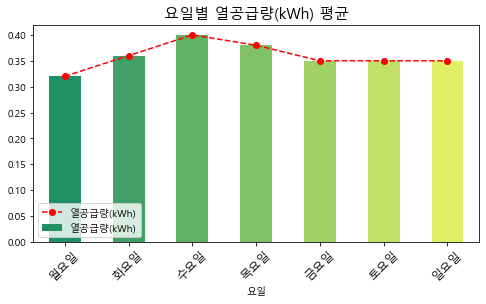

In [32]:
fig,ax = plt.subplots(1,1,figsize=(8,4)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', 7) ## 바 차트 색상
data_weekday[["요일","열공급량(kWh)"]].reindex([3,6,2,1,0,5,4]).plot.bar(x="요일",y="열공급량(kWh)", color=colors,ax=ax)
data_weekday[["요일","열공급량(kWh)"]].reindex([3,6,2,1,0,5,4]).plot(x="요일",y="열공급량(kWh)",color="r",
                 linestyle="--",marker="o",ax=ax)
plt.xticks(rotation=45,fontsize=12)
plt.title("요일별 열공급량(kWh) 평균",fontsize=15)
plt.show()

Text(0.5, 1.0, '열공급량(kWh)의 밀도추정함수 : Skew 값 4.57')

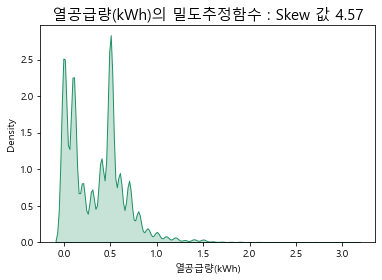

In [33]:
sns.kdeplot(org_data["열공급량(kWh)"], shade=True,color=colors[0])
plt.title("열공급량(kWh)의 밀도추정함수 : Skew 값 4.57",fontsize=15)

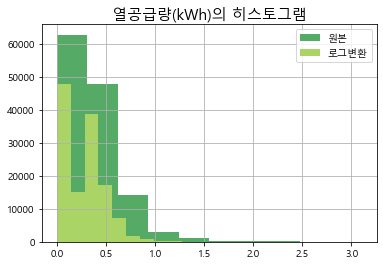

In [34]:
colors = sns.color_palette('summer', 2) ## 바 차트 색상
org_data["열공급량(kWh)"].hist(label="원본",color=colors[0])
np.log1p(org_data["열공급량(kWh)"]).hist(label="로그변환",color=colors[1])
plt.title("열공급량(kWh)의 히스토그램",fontsize=15)
plt.legend()

Text(0.5, 1.0, '천창의 밀도추정함수 : Skew 값 4.57')

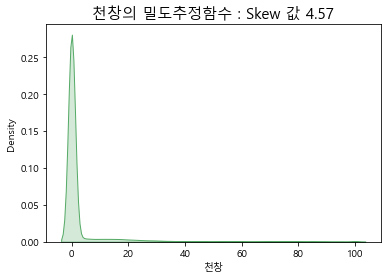

In [35]:
sns.kdeplot(org_data["천창"], shade=True,color=colors[0])
plt.title("천창의 밀도추정함수 : Skew 값 4.57",fontsize=15)

Text(0.5, 1.0, '누적강수량의 밀도추정함수 : Skew 값 7.38')

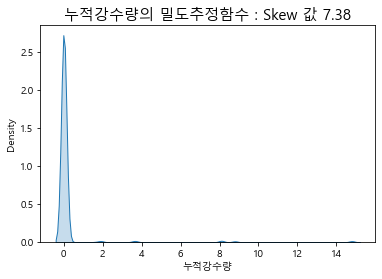

In [36]:
sns.kdeplot(org_data["누적강수량"], shade=True)
plt.title("누적강수량의 밀도추정함수 : Skew 값 7.38",fontsize=15)

Text(0.5, 1.0, '아황산가스_1시간의 밀도추정함수 : Skew 값 3.13')

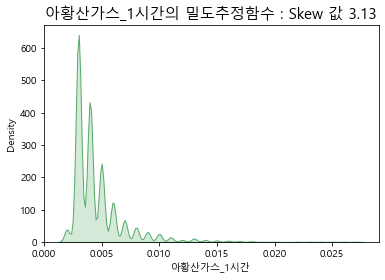

In [37]:
sns.kdeplot(org_data["아황산가스_1시간"], shade=True,color=colors[0])
plt.title("아황산가스_1시간의 밀도추정함수 : Skew 값 3.13",fontsize=15)